# ASSIGNMENT 1 DS- TRAIN TEST MODEL

By - Sonal Agrawal


Took help from a youtube tutorial by Quinn Wang 
Link to her youtube channel: https://www.youtube.com/channel/UCgc9e-Ma04hZWogxvw2lp9g

In [127]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.style

In [ ]:
test_df = pd.read_csv("https://raw.githubusercontent.com/SonalAgrawal15/ICG-Summer-Program-2021-DS/main/Assignment-1/data/train.csv")
train_df = pd.read_csv("https://raw.githubusercontent.com/SonalAgrawal15/ICG-Summer-Program-2021-DS/main/Assignment-1/data/train.csv")

In [53]:
pd.read_csv("https://raw.githubusercontent.com/SonalAgrawal15/ICG-Summer-Program-2021-DS/main/Assignment-1/data/train.csv")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
615,616,1,2,female,24.0,1,2,65.0000
616,617,0,3,male,34.0,1,1,14.4000
617,618,0,3,female,26.0,1,0,16.1000
618,619,1,2,female,4.0,2,1,39.0000


In [54]:
pd.read_csv("https://raw.githubusercontent.com/SonalAgrawal15/ICG-Summer-Program-2021-DS/main/Assignment-1/data/test.csv")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,621,0,3,male,27.0,1,0,14.4542
1,622,1,1,male,42.0,1,0,52.5542
2,623,1,3,male,20.0,1,1,15.7417
3,624,0,3,male,21.0,0,0,7.8542
4,625,0,3,male,21.0,0,0,16.1000
...,...,...,...,...,...,...,...,...
266,887,0,2,male,27.0,0,0,13.0000
267,888,1,1,female,19.0,0,0,30.0000
268,889,0,3,female,NaN,1,2,23.4500
269,890,1,1,male,26.0,0,0,30.0000


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  620 non-null    int64  
 1   Survived     620 non-null    int64  
 2   Pclass       620 non-null    int64  
 3   Sex          620 non-null    object 
 4   Age          489 non-null    float64
 5   SibSp        620 non-null    int64  
 6   Parch        620 non-null    int64  
 7   Fare         620 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 38.9+ KB


In [56]:
train_df["Survived"].value_counts()

0    376
1    244
Name: Survived, dtype: int64

<AxesSubplot:>

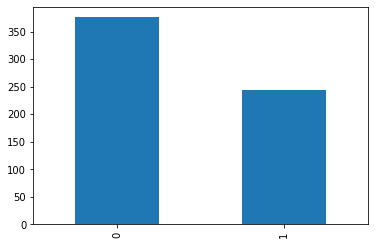

In [57]:
train_df["Survived"].value_counts().plot(kind="bar")

<AxesSubplot:>

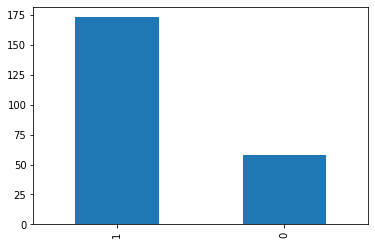

In [58]:
train_df[train_df["Sex"]=="female"]["Survived"].value_counts().plot(kind="bar")

<AxesSubplot:>

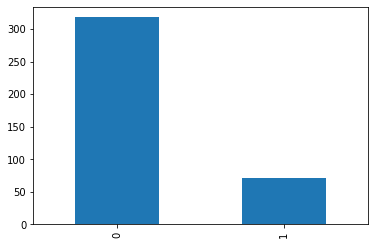

In [59]:
train_df[train_df["Sex"]=="male"]["Survived"].value_counts().plot(kind="bar")

<AxesSubplot:>

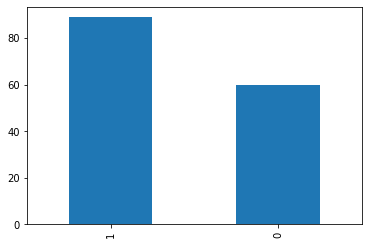

In [60]:
train_df[train_df["Pclass"]==1]["Survived"].value_counts().plot(kind="bar")

<AxesSubplot:>

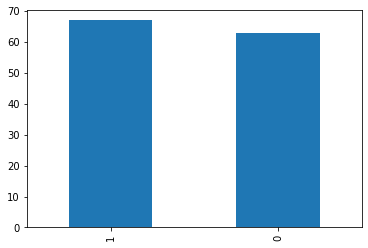

In [61]:
train_df[train_df["Pclass"]==2]["Survived"].value_counts().plot(kind="bar")

<AxesSubplot:>

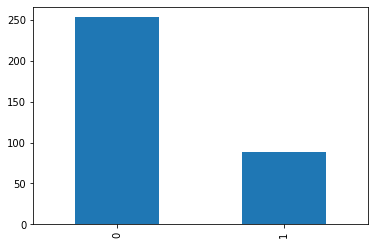

In [62]:
train_df[train_df["Pclass"]==3]["Survived"].value_counts().plot(kind="bar")

In [75]:
for sex in ["male", "female"]:
    for Pclass in [1,2,3]:
        print("Survival ratio for",sex,"of class",Pclass,"is:")
        print(train_df[(train_df["Sex"]==sex)&(train_df["Pclass"]==Pclass)]["Survived"].value_counts()[1]/len(train_df[(train_df["Sex"]==sex)&(train_df["Pclass"]==Pclass)]["Survived"]))

Survival ratio for male of class 1 is:
0.3132530120481928
Survival ratio for male of class 2 is:
0.18055555555555555
Survival ratio for male of class 3 is:
0.13675213675213677
Survival ratio for female of class 1 is:
0.9545454545454546
Survival ratio for female of class 2 is:
0.9310344827586207
Survival ratio for female of class 3 is:
0.5233644859813084


In [76]:
train_df[train_df["Age"].isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,6,0,3,male,NaN,0,0,8.4583
17,18,1,2,male,NaN,0,0,13.0000
19,20,1,3,female,NaN,0,0,7.2250
26,27,0,3,male,NaN,0,0,7.2250
28,29,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...,...
601,602,0,3,male,NaN,0,0,7.8958
602,603,0,1,male,NaN,0,0,42.4000
611,612,0,3,male,NaN,0,0,7.0500
612,613,1,3,female,NaN,1,0,15.5000


In [81]:
train_df.loc[(train_df["Age"].isna()) & (train_df["Sex"]=="male"), "Age"]= train_df[(~train_df["Age"].isna()) & (train_df["Sex"]=="male")]["Age"].median()
train_df.loc[(train_df["Age"].isna()) & (train_df["Sex"]=="female"), "Age"]= train_df[(~train_df["Age"].isna()) & (train_df["Sex"]=="female")]["Age"].median()

<AxesSubplot:ylabel='Frequency'>

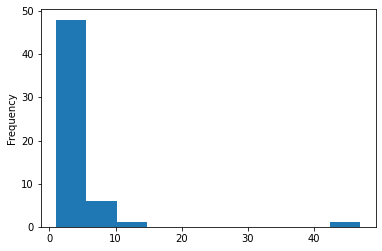

In [96]:
train_df[train_df["Sex"]=="female"]["Age"].value_counts().plot(kind="hist")

In [84]:
train_df[(~train_df["Age"].isna()) & (train_df["Sex"]=="female")]["Age"].median()

27.0

In [86]:
train_df[(~train_df["Age"].isna()) & (train_df["Sex"]=="male")]["Age"].median()

29.0

In [91]:
train_df[(~train_df["Age"].isna()) & (train_df["Sex"]=="male")]["Age"].mean()

30.584190231362467

In [92]:
train_df[(~train_df["Age"].isna()) & (train_df["Sex"]=="female")]["Age"].mean()

27.604978354978353

In [97]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  620 non-null    int64  
 1   Survived     620 non-null    int64  
 2   Pclass       620 non-null    int64  
 3   Sex          620 non-null    object 
 4   Age          620 non-null    float64
 5   SibSp        620 non-null    int64  
 6   Parch        620 non-null    int64  
 7   Fare         620 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 38.9+ KB


In [98]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
615,616,1,2,female,24.0,1,2,65.0000
616,617,0,3,male,34.0,1,1,14.4000
617,618,0,3,female,26.0,1,0,16.1000
618,619,1,2,female,4.0,2,1,39.0000
